In [1]:
from RNNAutoencoder import RNNAutoencoder, RNNAutoencoderOneLayer
from Trainer  import Trainer
from GradientChecker import check_all_gradients
from Optim import MomentumSGD
from Dataset import Dataset
import numpy as np

In [30]:
check_all_gradients(1)

Checking Layers Only
Checking Linear Layer
Gradient check passed!
Checking Linear Layer Paramter W
Gradient check passed!
Checking Linear Layer Paramter b
Gradient check passed!
Checking LSTM Layer
Gradient check passed!
Checking LSTM Parameter W_forget
Gradient check passed!
Checking LSTM Parameter W_input
Gradient check passed!
Checking LSTM Parameter W_cell_state
Gradient check passed!
Checking LSTM Parameter W_output
Gradient check passed!
Checking LSTM Parameter b_forget
Gradient check passed!
Checking LSTM Parameter b_input
Gradient check passed!
Checking LSTM Parameter b_cell_state
Gradient check passed!
Checking LSTM Parameter b_output
Gradient check passed!
Checking All Two Layer Model Paramters
Checking gradient for lstm1 parameter W_forget
Gradient check passed!
Checking gradient for lstm1 parameter W_input
Gradient check passed!
Checking gradient for lstm1 parameter W_cell_state
Gradient check passed!
Checking gradient for lstm1 parameter W_output
Gradient check passed!
Che

In [2]:
VAC_SIZE=100
SEQ_SIZE=10
NUM_EPOCHS=150
TRAIN_SIZE=5000
lr=5e-2
lr_decay=0.75

In [3]:
lstm_aenc = RNNAutoencoderOneLayer(vac_size=VAC_SIZE, hidden_size=128, seq_size=SEQ_SIZE)

In [4]:
data_gen = Dataset(vac_size=VAC_SIZE, seq_size=SEQ_SIZE)

In [5]:
optim = MomentumSGD()

In [6]:
trainer = Trainer(model=lstm_aenc, dataset=data_gen, optimizer=optim, num_epochs=NUM_EPOCHS, train_size=TRAIN_SIZE, lr=lr, lr_decay=lr_decay)

In [7]:
loss_history = trainer.fit()

Loss at epoch 1 is 3.8257628474347984
Loss at epoch 2 is 3.3578340621855496
Loss at epoch 3 is 2.958548048991598
Loss at epoch 4 is 2.6278838726461275
Loss at epoch 5 is 2.3420854077974274
Loss at epoch 6 is 2.032342333070803
Loss at epoch 7 is 1.7526555603735208
Loss at epoch 8 is 1.5092930576350645
Loss at epoch 9 is 1.3023545843094448
Loss at epoch 10 is 1.1450346615875167
Loss at epoch 11 is 1.0287302617248753
Loss at epoch 12 is 0.9105415381720966
Loss at epoch 13 is 0.7927020923431807
Loss at epoch 14 is 0.7203265536960342
Loss at epoch 15 is 0.6525267503387213
Loss at epoch 16 is 0.5876356987304544
Loss at epoch 17 is 0.5540134574926356
Loss at epoch 18 is 0.5223108633406774
Loss at epoch 19 is 0.4669743891544919
LR reduction
Loss at epoch 20 is 0.46981265536649314
Loss at epoch 21 is 0.28826315335451946
Loss at epoch 22 is 0.26161119992203036
LR reduction
Loss at epoch 23 is 0.26104802351818596
Loss at epoch 24 is 0.16469479322637584
Loss at epoch 25 is 0.1499369497001004
Loss 

In [24]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

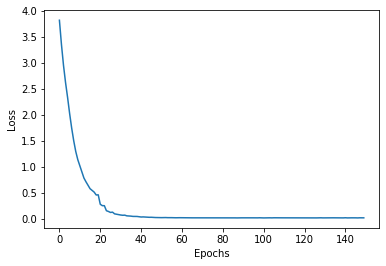

In [25]:
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')

В качестве критериев качества можно выбрать такие как: многоклассовая точность, количество инверсий в последовательности или же количество неправильных чисел, которые стоят на соотвествущих местах. 
Проблема точности в том, что среди последовательности может быть мало классов, поэтому для одной последовательности не имеет смысла смотреть. 
Проблема инверсий в том, что иногда модель может выдавать число, которое стоит на правильном месте, но в исходной последовательности его не было. 
Поэтому выберем такой критерий качества как количество несоответствующих чисел.

In [26]:
def test_trained_model(model, dataset, test_size):
    not_right_seqs = []
    for _ in range(test_size):
        n_wrong = 0
        X, y = dataset.generate_seq()
        ans = model.predict(X)
        n_wrong = np.sum(ans!=y)
        if n_wrong != 0:
            not_right_seqs.append((y, ans))
    return not_right_seqs

In [27]:
not_right_seqs = test_trained_model(lstm_aenc, data_gen, 10000)

In [28]:
def show_wrong_seqs(lst):
    print(f'There is {len(lst)} wrong seqs')
    for t in lst:
        print('-----------------')
        print(f'Right seq {t[0]}')
        print(f'Wrong seq {t[1]}')
        print('-----------------')

In [29]:
show_wrong_seqs(not_right_seqs)

There is 446 wrong seqs
-----------------
Right seq [ 0  2  3  3 10 31 67 81 88 99]
Wrong seq [ 0  1  3  3 10 31 67 81 88 99]
-----------------
-----------------
Right seq [ 4 36 36 39 46 55 62 62 62 68]
Wrong seq [ 4 36 36 39 46 55 62 62 63 68]
-----------------
-----------------
Right seq [ 3  8 36 48 53 54 55 56 68 76]
Wrong seq [ 3  8 36 48 53 54 56 56 68 76]
-----------------
-----------------
Right seq [ 8 16 21 53 64 65 72 80 84 95]
Wrong seq [ 8 16 21 53 64 65 72 79 84 95]
-----------------
-----------------
Right seq [17 40 40 40 42 48 49 52 79 83]
Wrong seq [17 40 40 40 42 49 51 52 79 83]
-----------------
-----------------
Right seq [18 23 27 30 36 38 52 67 68 72]
Wrong seq [18 23 25 30 36 38 52 67 68 72]
-----------------
-----------------
Right seq [10 16 17 26 48 65 65 65 73 76]
Wrong seq [10 16 17 26 48 65 65 73 73 76]
-----------------
-----------------
Right seq [19 45 46 50 60 65 66 70 92 92]
Wrong seq [19 45 45 50 60 65 66 70 92 92]
-----------------
----------------

Как видно среди 10000 последовательностей всего 446 - это последовательности с ошибками, то есть где-то 4.46% последовательностей ошибочны. 
При том, если исследовать причины ошибок, то видно, что модель обычно ошибается в одном элементе последовательности, которого нет в оригинальной последовательности, но при этом общая последовательность является отсортированной